<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
plt.style.use("fivethirtyeight")
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
movies[["duration"]].mean()

duration    120.979571
dtype: float64

In [6]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
# Answer:
print("Shortest duration: ",movies.duration.min())
print("Longest duration: ",movies.duration.max())

Shortest duration:  64
Longest duration:  242


#### Create a histogram of duration, choosing an "appropriate" number of bins.

In [8]:
movies[["duration"]].shape

(979, 1)

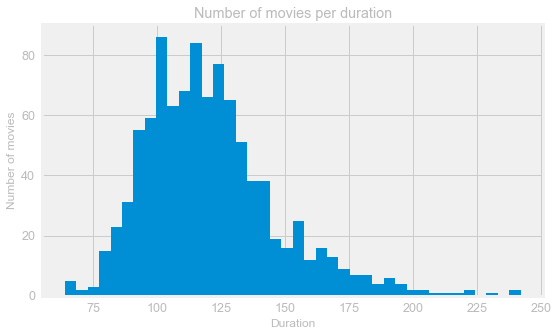

In [9]:
# Answer:
movies.duration.hist(bins=40, figsize=(8,5))
plt.xlabel('Duration');
plt.ylabel('Number of movies');
plt.title('Number of movies per duration');

#### Use a box plot to display that same data.

<AxesSubplot:>

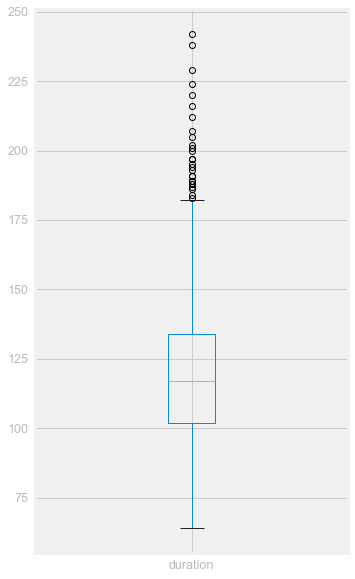

In [10]:
# Answer:
movies.boxplot(column='duration',figsize=(5,10))

## Intermediate level

In [11]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Count how many movies have each of the content ratings.

In [12]:
# Answer:
movies[['content_rating']].value_counts()

content_rating
R                 460
PG-13             189
PG                123
NOT RATED          65
APPROVED           47
UNRATED            38
G                  32
NC-17               7
PASSED              7
X                   4
GP                  3
TV-MA               1
dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

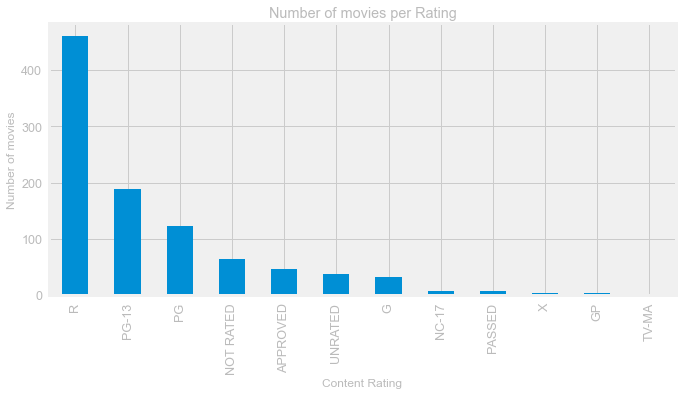

In [13]:
# Answer:
movies.content_rating.value_counts().plot(kind='bar', figsize=(10,5));
plt.xlabel('Content Rating');
plt.ylabel('Number of movies');
plt.title('Number of movies per Rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [14]:
# Answer:
movies.replace({"NOT RATED":"UNRATED",
               "APPROVED":"UNRATED",
               "PASSED":"UNRATED",
               "GP":"UNRATED"}, inplace=True)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [15]:
# Answer:
movies.replace({"X":"NC-17",
               "TV-MA":"NC-17",}, inplace=True)

#### Count the number of missing values in each column.

In [16]:
# Answer:
movies.isnull().sum()


star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [17]:
# Answer:
movies.content_rating.fillna(value="UNRATED", inplace=True)

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [18]:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [19]:
print("Average rating for movies 2 hours or longer:    {:.2f}".format(
    movies[movies.duration >= 120].star_rating.mean()))
print("Average rating for movies shorter than 2 hours: {:.2f}".format(
    movies[movies.duration < 120].star_rating.mean()))

Average rating for movies 2 hours or longer:    7.95
Average rating for movies shorter than 2 hours: 7.84


#### Use a visualization to detect whether there is a relationship between duration and star rating.

<AxesSubplot:>

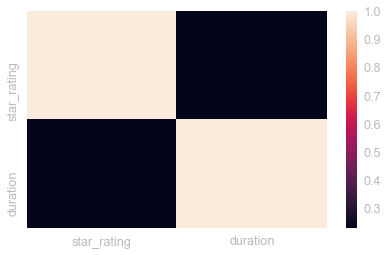

In [20]:
# Answer:
# correlation heatmap
movies.corr()
sns.heatmap(movies.corr())


#### Calculate the average duration for each genre.

In [21]:
# Answer:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

In [22]:
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    163
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

In [64]:
# Answer:
# Map content_rating to a numeric value so that plots can be colored by content_rating.
# movies['content_rating'] = movies.content_rating.map({
#     'R':0, 'PG-13':1, 'UNRATED':2, 'PG':3, 'G':4, 'NC-17':5
# })

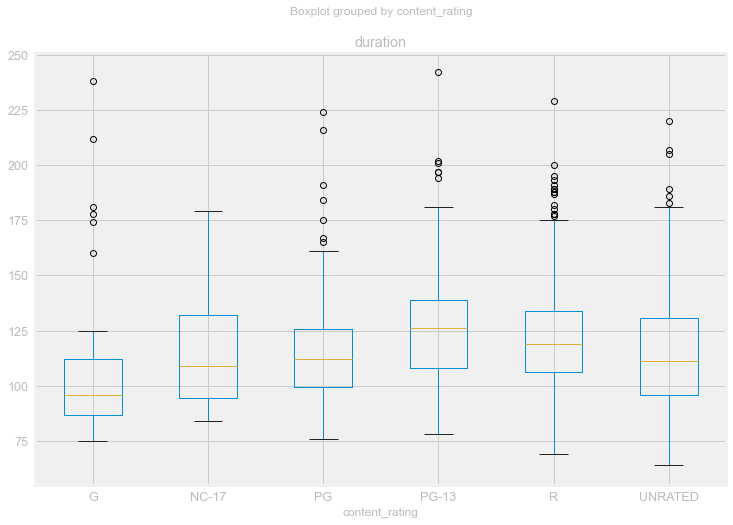

In [23]:
movies.boxplot(column='duration', by='content_rating', figsize=(12,8));

#### Determine the top rated movie (by star rating) for each genre.

In [24]:
# Answer:
movies.groupby('content_rating').star_rating.max()

content_rating
G          8.6
NC-17      8.4
PG         8.8
PG-13      9.0
R          9.3
UNRATED    8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [124]:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [127]:
# Answer:
movies.duplicated('actors_list').sum()

10

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [131]:
# Answer:


TypeError: '>' not supported between instances of 'str' and 'int'

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!